## Homework #2 – Numeric Computing
### Problem 2(a)
### Tejas Harishchandra Acharya
### 08/08/2025

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from scipy.cluster.vq import kmeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Constants
MICKEY_FILENAME = "../../data/input/mickey.csv"
PATTERN = "^#"
CLASS_DICT = {'Head':1, 'Ear_left':0, 'Ear_right':2}
COLOR_DICT = {'Head':'b', 'Ear_left':'r', 'Ear_right':'g'}
K = 3
KMEANS_CENTROIDS_FILENAME = "../../data/output/kmeans_centroids.txt"
KMEANS_LABELS_FILENAME = "../../data/output/kmeans_labels.txt"

In [3]:
mickey_X = []
mickey_label = []

with open(MICKEY_FILENAME, "r") as file:
    for i in csv.reader(file):
        if not re.search(PATTERN, i[0]):
            x1, x2, label = i[0].split()
            mickey_X.append([float(x1), float(x2)])
            mickey_label.append(label)
            
mickey_X = np.array(mickey_X)
mickey_label = np.array(mickey_label)

mickey_X_true_head = mickey_X[mickey_label == "Head"]
mickey_X_true_ear_left = mickey_X[mickey_label == "Ear_left"]
mickey_X_true_ear_right = mickey_X[mickey_label == "Ear_right"]

mickey_Y = list(map(lambda x: CLASS_DICT[x], mickey_label))
mickey_Y = np.array(mickey_Y)

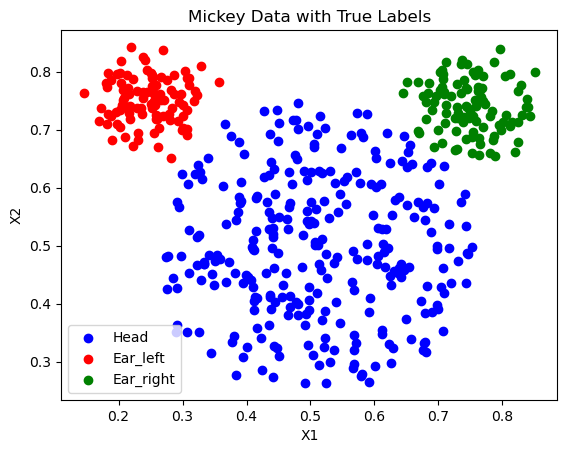

In [4]:
plt.figure()
plt.scatter(mickey_X_true_head[:, 0], mickey_X_true_head[:, 1], c='b')
plt.scatter(mickey_X_true_ear_left[:, 0], mickey_X_true_ear_left[:, 1], c='r')
plt.scatter(mickey_X_true_ear_right[:, 0], mickey_X_true_ear_right[:, 1], c='g')
plt.legend(["Head", "Ear_left", "Ear_right"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Mickey Data with True Labels")
plt.show()

In [5]:
centroids, _ = kmeans(mickey_X, K)
centroids = centroids[centroids[:, 0].argsort()]

In [17]:
np.savetxt(KMEANS_CENTROIDS_FILENAME, centroids)

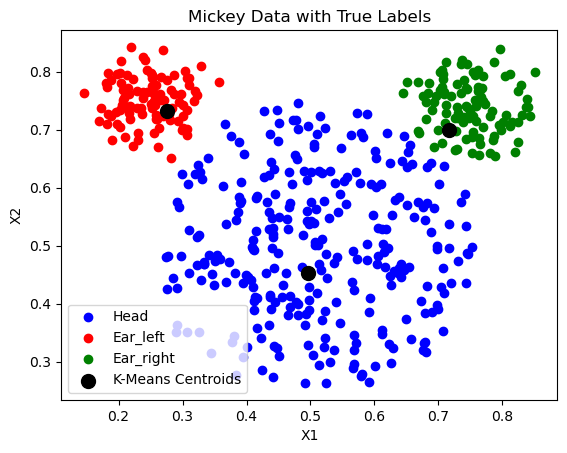

In [6]:
plt.figure()
plt.scatter(mickey_X_true_head[:, 0], mickey_X_true_head[:, 1], c='b')
plt.scatter(mickey_X_true_ear_left[:, 0], mickey_X_true_ear_left[:, 1], c='r')
plt.scatter(mickey_X_true_ear_right[:, 0], mickey_X_true_ear_right[:, 1], c='g')
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100)
plt.legend(["Head", "Ear_left", "Ear_right", "K-Means Centroids"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Mickey Data with True Labels")
plt.show()

In [7]:
kmeans_y_hat = []
for i in mickey_X:
    distances = list(map(lambda x: np.linalg.norm(i - x), centroids))
    kmeans_y_hat.append(np.argmin(distances))

kmeans_y_hat = np.array(kmeans_y_hat)

mickey_X_pred_head = mickey_X[kmeans_y_hat == 1]
mickey_X_pred_ear_left = mickey_X[kmeans_y_hat == 0]
mickey_X_pred_ear_right = mickey_X[kmeans_y_hat == 2]

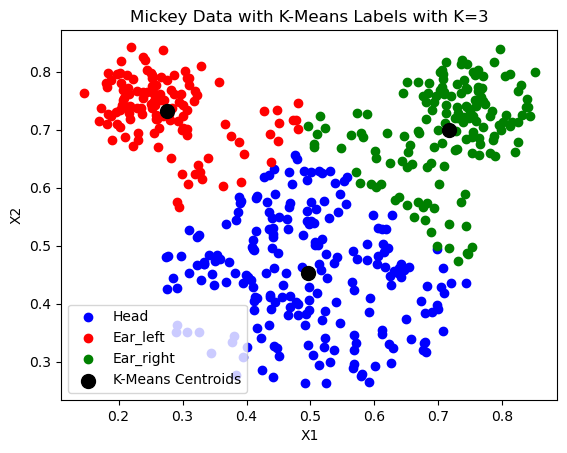

In [8]:
plt.figure()
plt.scatter(mickey_X_pred_head[:, 0], mickey_X_pred_head[:, 1], c='b')
plt.scatter(mickey_X_pred_ear_left[:, 0], mickey_X_pred_ear_left[:, 1], c='r')
plt.scatter(mickey_X_pred_ear_right[:, 0], mickey_X_pred_ear_right[:, 1], c='g')
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100)
plt.legend(["Head", "Ear_left", "Ear_right", "K-Means Centroids"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Mickey Data with K-Means Labels with K=3")
plt.show()

In [19]:
np.savetxt(KMEANS_LABELS_FILENAME, kmeans_y_hat, fmt='%d')

<Figure size 640x480 with 0 Axes>

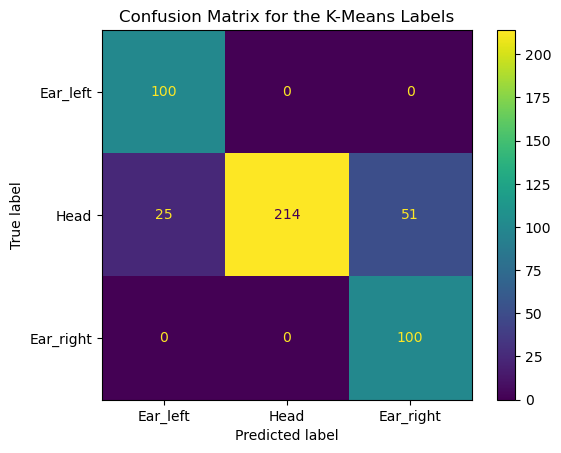

In [21]:
c_matrix_kmeans = confusion_matrix(mickey_Y, kmeans_y_hat)

plt.figure()
c_mat_disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_kmeans, display_labels=['Ear_left', 'Head', 'Ear_right'])
c_mat_disp.plot()
plt.title("Confusion Matrix for the K-Means Labels")
plt.show()